# Web Scraping with BeautifulSoup

This short interactive essay describes the steps towards establishing the frequency of lemmas in a text. The example text used in this analysis is *The art of war* by Sun Tzu accessed via [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) from [Project Gutenberg](https://www.gutenberg.org). [NLTK](https://www.nltk.org) modules are then used to pre-process the text and analyse it. 

In [1]:
import requests
r = requests.get('https://www.gutenberg.org/files/17405/17405-h/17405-h.htm')

# print(r)

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content, 'html.parser')
# print(soup.prettify())

All parts of the html file that are of interest to the following analysis are contained within paragraphs and headers. The table of contents and other html information not pertaining to the text written by Sun Tzu can be omitted by extracting all paragraphs and headers from the file.

In [3]:
text=''

for header in soup.find_all(['h1', 'h2', 'h3']):
    text += header.get_text()+ u'\n'
    for item in header.next_siblings:
        if item.name and item.name.startswith('h'):
            break
        if item.name == 'p':
            text += item.get_text()+ u'\n'

# print(text)

# import io

# with io.open('text.txt', 'w', encoding='utf8') as f:
#     for header in soup.find_all(['h1', 'h2', 'h3']):
#         f.write(header.get_text() )
#         for item in header.next_siblings:
#             if item.name and item.name.startswith('h'):
#                 break
#             if item.name == 'p':
#                 f.write(item.get_text() )

Next, remaining redundant elements (the numbering of paragraphs) are removed from the extracted text:

In [4]:
import re

text = re.sub(r'\(\d\)|\d\.|\d',r'',text)

# print(text)


## Scrapped text can now be analysed with NLTK following the steps of a typical NLP pipeline.

### Tokenization

In [5]:
import nltk

tokens = nltk.word_tokenize(text)
# print(tokens)

### POS tagging

In [6]:

tags = nltk.pos_tag(tokens)

tagged = []

for item in tags:
    tagged.append(item)
        
print(tagged)

[('SUN', 'NNP'), ('TZU', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('ART', 'NNP'), ('OF', 'NNP'), ('WAR', 'NNP'), ('THE', 'NNP'), ('OLDEST', 'NNP'), ('MILITARY', 'NNP'), ('TREATISE', 'NNP'), ('IN', 'NNP'), ('THE', 'NNP'), ('WORLD', 'NNP'), ('Contents', 'NNP'), ('I', 'PRP'), ('.', '.'), ('LAYING', 'CC'), ('PLANS', 'JJ'), ('Sun', 'NNP'), ('Tzŭ', 'NNP'), ('said', 'VBD'), (':', ':'), ('The', 'DT'), ('art', 'NN'), ('of', 'IN'), ('war', 'NN'), ('is', 'VBZ'), ('of', 'IN'), ('vital', 'JJ'), ('importance', 'NN'), ('to', 'TO'), ('the', 'DT'), ('State', 'NNP'), ('.', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('matter', 'NN'), ('of', 'IN'), ('life', 'NN'), ('and', 'CC'), ('death', 'NN'), (',', ','), ('a', 'DT'), ('road', 'NN'), ('either', 'DT'), ('to', 'TO'), ('safety', 'NN'), ('or', 'CC'), ('to', 'TO'), ('ruin', 'VB'), ('.', '.'), ('Hence', 'VB'), ('it', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('subject', 'NN'), ('of', 'IN'), ('inquiry', 'NN'), ('which', 'WDT'), ('can', 'MD'), ('on', 'IN'), ('no'

### Lemmatization

In [7]:

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from collections import defaultdict
nltk.download('omw-1.4')

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

lemmatizer = WordNetLemmatizer()

lemmas = {}

for token, tag in tagged:
    lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])

    if lemma not in lemmas:
        lemmas[lemma] = 1
    else:
        lemmas[lemma] += 1

    # print(token, "-->", lemma)

# print(lemmas)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\l\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### identifying and removing STOP WORDS

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# swless_tokens = [word for word in tokens if not word in stopwords.words('english')]

# print(swless_tokens)      

swless_lemmas = lemmas.copy() 

stop_words = {}

for lemma in swless_lemmas:
    if lemma in stopwords.words('english'):
        stop_words[lemma] = 1

for key in stop_words.keys():
    del swless_lemmas[key]

# print(swless_lemmas)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\l\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\l\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Most frequent lemmas (without stop words)



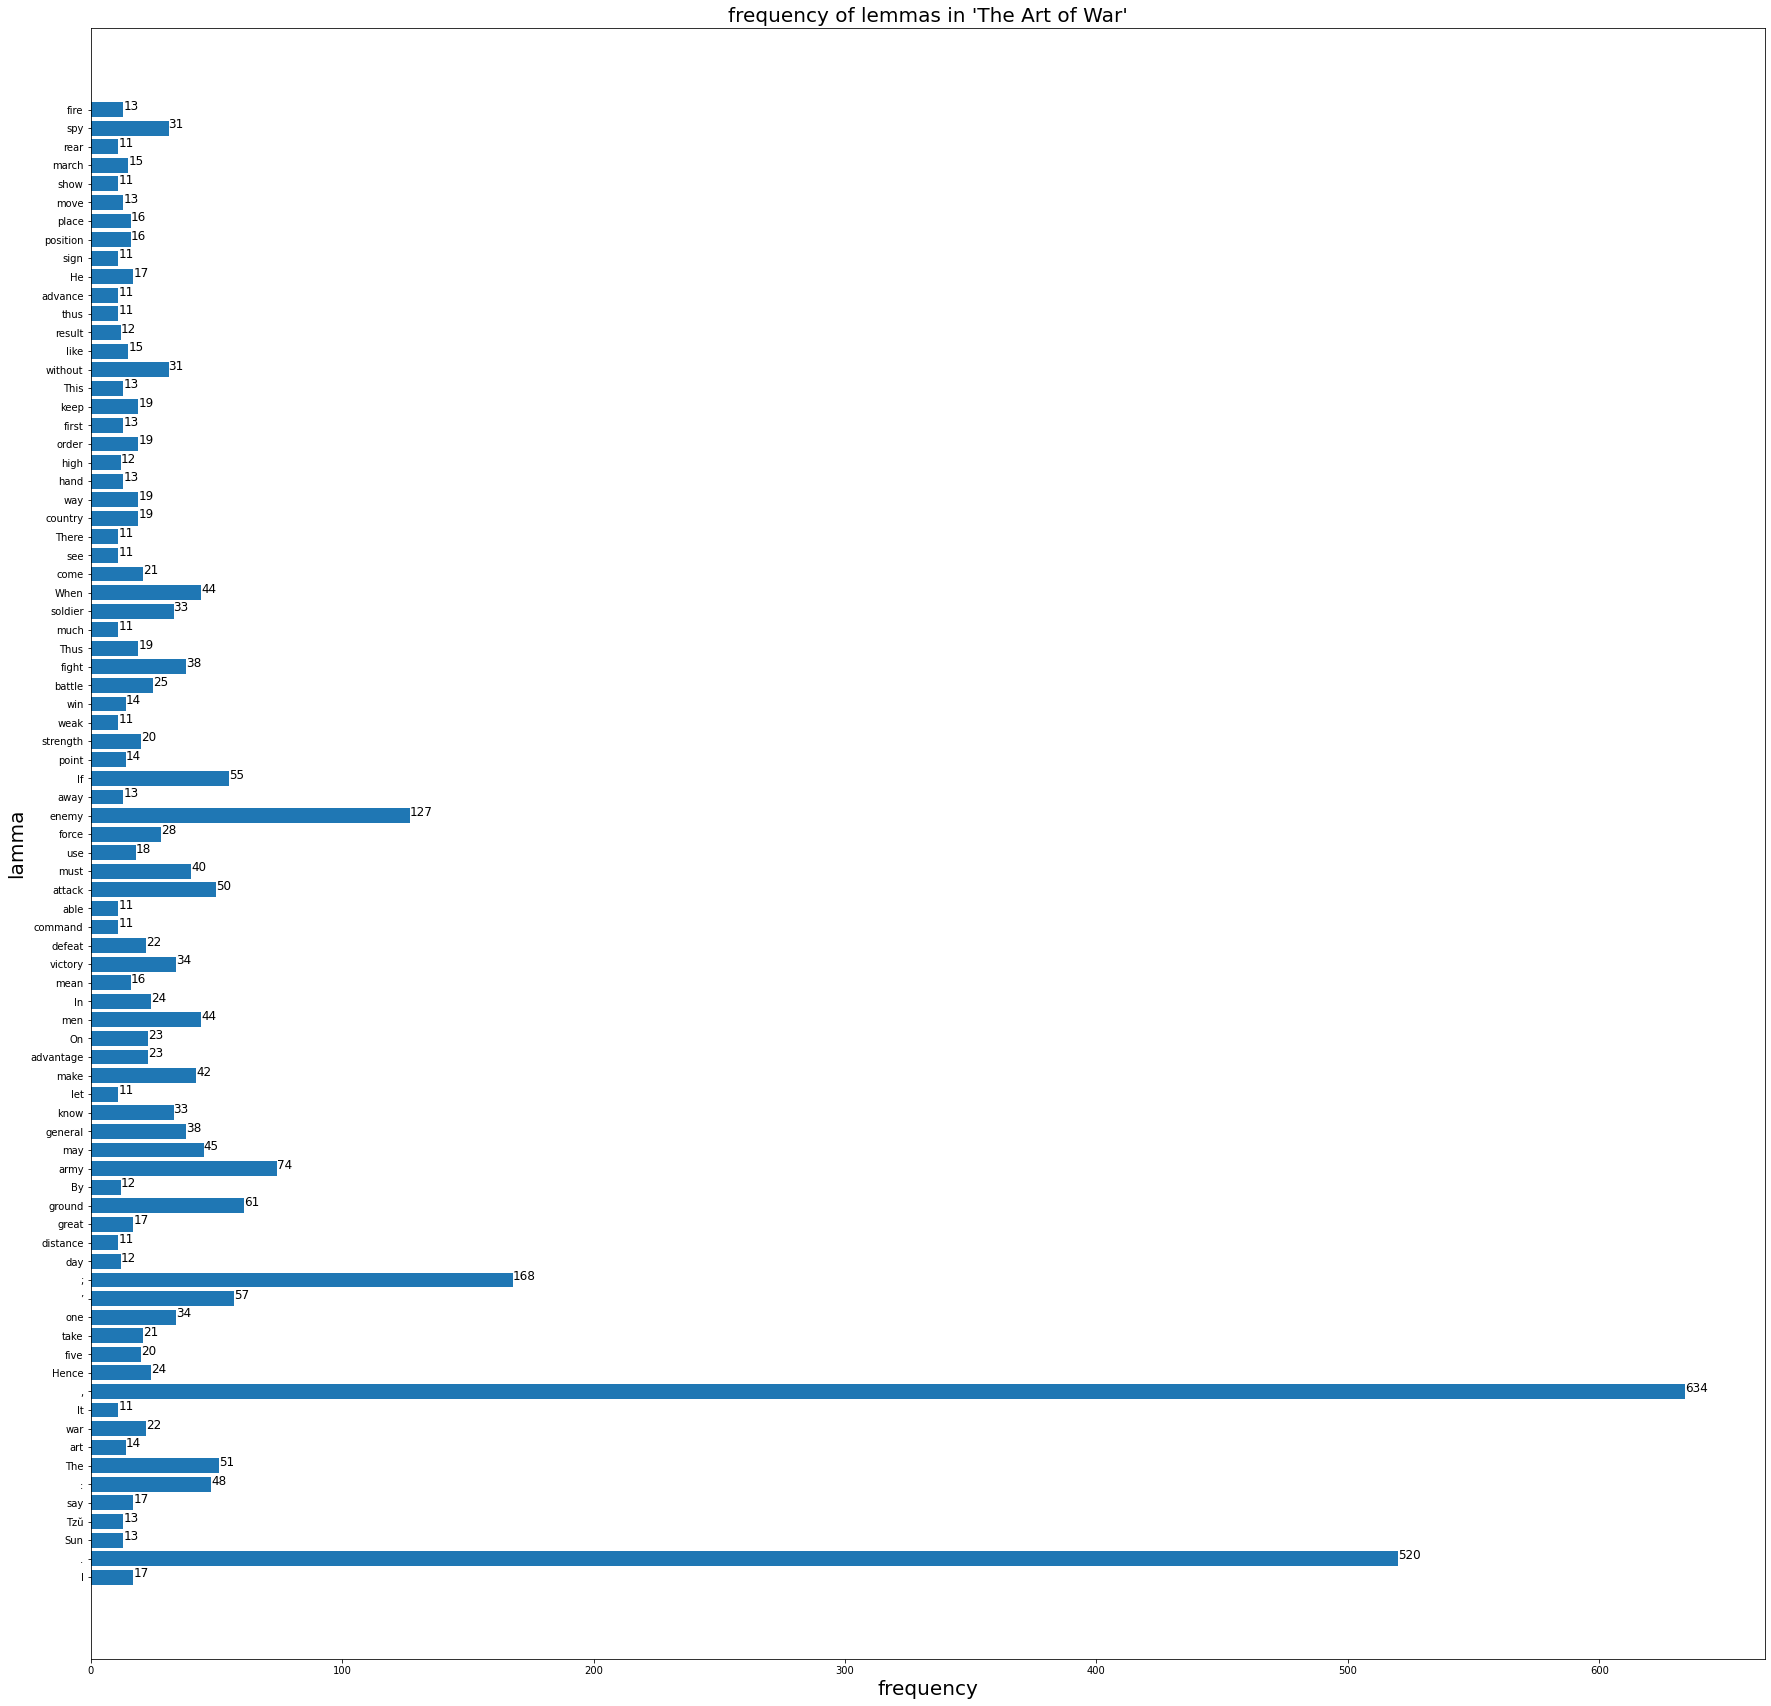

In [11]:
freq_lemmas = {key:val for key, val in swless_lemmas.items() if val > 10}

import matplotlib.pyplot as mpl
mpl.rcParams["figure.figsize"] = (30,30)

keys = list(freq_lemmas.keys())
values = list(freq_lemmas.values())

mpl.barh(keys, values)
# mpl.tick_params(axis='both', which='major', labelsize=12)
mpl.title("""frequency of lemmas in 'The Art of War'""", size=20)
mpl.xlabel('frequency', size=20)
mpl.ylabel('lamma', size=20)
for i, v in enumerate(values):
    mpl.text(v, i, str(v), size=12)
mpl.show()